<a href="https://colab.research.google.com/github/j23-cs167/project-2-JacobWilliams370/blob/main/Project2_Williams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name:

Proposed Points (out of 25):

**Points Attempted:** For this project, I attempted to achieve all the points (25/25) like I did for the first project. Below is a what I think I deserve for each category:

Problem: 2/2

Data Preparation: 2/2

Research: 8/10

Analysis: 10/10

Bumps in the road: 1/1

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

When I was debating what I wanted to do for my final project, I couldn't decide if I wanted to do a typical regression or a CNN. A typical regression is what I would be doing most likely on later in my career, but I was fascinated by CNN's. Ultimately, I decided to go with the CNN because I've completed lots of regression research before and I thought working with a CNN would give me a better range of experience.

Our dataset deals with osteoarthritis, which is a condition where the natural cushioning betweens our joints, cartilage slowly wears away. This can give a person pain and the bones of the joints rub together. Our dataset contains pictures of healthy knees and knees with osteoarthritis. Our training set contains **2350** observations and our testing set contains **845** observations. I pulled this dataset off kaggle and it has decent usability with 7.5 (https://www.kaggle.com/datasets/farjanakabirsamanta/osteoarthritis-prediction). Below is a description of our problem.

**Problem:** How accurately can we predict whether or not a person has osteoarthritis in their knees using a CNN?

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

Since we are using a CNN, I don't believe there is much I have to do to prep our data since it deals with pictures. Thus, we do not deal with missing data here. 

Thus, to make our data usable we need to split our dataset into testing and training. Below, I read in the separate training and testing datasets. Then I used the functions below to ensure our separate training and test datasets were read in correctly. 

Although, we do not need to necessarily deal with missing data, there are steps we must take to ensure our dataset is usable. We first we to specifiy the image dimensions for width and length, which are 200. Next, we need to determine the batch size to feed into our neural network, which we will use 32. Lastly, we need to rescale our pixel values, which range from 0 to 255, between 0 and 1.

After these steps, I'm confident that our data is clean and ready to be used. 

In [2]:
# load and prepare your data here
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS167/datasets/osteo_data1/train/train' 
test_data_dir = '/content/drive/MyDrive/CS167/datasets/osteo_data1/test/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 2350 images belonging to 2 classes.
Found 845 images belonging to 2 classes.


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


# 3. Research

Put your code and your experiments here.

In [ ]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=75, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 73728)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

<ipython-input-10-e103118e4192>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


74/74 [==============================] - 11s 143ms/step - loss: 0.6405 - accuracy: 0.6409 - val_loss: 0.8987 - val_accuracy: 0.3254
Epoch 2/75
74/74 [==============================] - 10s 139ms/step - loss: 0.5971 - accuracy: 0.6626 - val_loss: 1.2763 - val_accuracy: 0.3266
Epoch 3/75
74/74 [==============================] - 11s 152ms/step - loss: 0.5950 - accuracy: 0.6647 - val_loss: 0.9753 - val_accuracy: 0.3266
Epoch 4/75
74/74 [==============================] - 10s 140ms/step - loss: 0.5895 - accuracy: 0.6553 - val_loss: 1.4062 - val_accuracy: 0.3266
Epoch 5/75
74/74 [==============================] - 10s 139ms/step - loss: 0.5589 - accuracy: 0.6736 - val_loss: 1.9706 - val_accuracy: 0.3302
Epoch 6/75
74/74 [==============================] - 11s 142ms/step - loss: 0.5312 - accuracy: 0.6949 - val_loss: 1.7722 - val_accuracy: 0.3266
Epoch 7/75
74/74 [==============================] - 10s 139ms/step - loss: 0.5242 - accuracy: 0.7191 - val_loss: 1.9762 - val_accuracy: 0.3195
Epoch 8/75

Our first model appears to be underfitting.

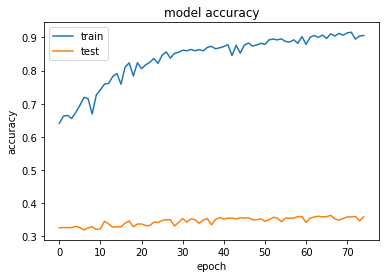

In [11]:
# Normal CNN Graph
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# Tuned CNN
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.05, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model2.summary()

training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=100, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 23, 23, 32)      

<ipython-input-8-cfdc3ce4e42c>:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results2 = model2.fit_generator(


74/74 [==============================] - 12s 162ms/step - loss: 0.6537 - accuracy: 0.6515 - val_loss: 0.8433 - val_accuracy: 0.3266
Epoch 2/100
74/74 [==============================] - 11s 152ms/step - loss: 0.6410 - accuracy: 0.6553 - val_loss: 1.0405 - val_accuracy: 0.3266
Epoch 3/100
74/74 [==============================] - 11s 148ms/step - loss: 0.5979 - accuracy: 0.6523 - val_loss: 1.4178 - val_accuracy: 0.3302
Epoch 4/100
74/74 [==============================] - 11s 150ms/step - loss: 0.5822 - accuracy: 0.6540 - val_loss: 2.8869 - val_accuracy: 0.3266
Epoch 5/100
74/74 [==============================] - 11s 149ms/step - loss: 0.5789 - accuracy: 0.6506 - val_loss: 3.4445 - val_accuracy: 0.3266
Epoch 6/100
74/74 [==============================] - 11s 150ms/step - loss: 0.5690 - accuracy: 0.6591 - val_loss: 2.7102 - val_accuracy: 0.3361
Epoch 7/100
74/74 [==============================] - 11s 149ms/step - loss: 0.5626 - accuracy: 0.6613 - val_loss: 3.4342 - val_accuracy: 0.3385
Epoc

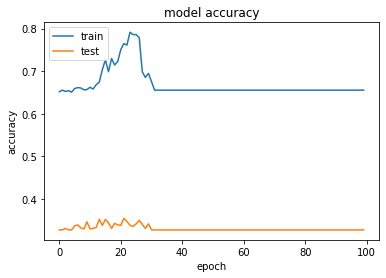

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Tuned CNN
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, (3, 3),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.005, momentum=0.9)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model3.summary()

training_results3 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=50, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 23, 23, 32)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
<ipython-input-12-101f4a6733c6>:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results3 = model2.fit_generator(


Epoch 1/50
74/74 [==============================] - 11s 148ms/step - loss: 0.6450 - accuracy: 0.6553 - val_loss: 0.8605 - val_accuracy: 0.3266
Epoch 2/50
74/74 [==============================] - 11s 149ms/step - loss: 0.6448 - accuracy: 0.6553 - val_loss: 0.8304 - val_accuracy: 0.3266
Epoch 3/50
74/74 [==============================] - 12s 160ms/step - loss: 0.6456 - accuracy: 0.6553 - val_loss: 0.8247 - val_accuracy: 0.3266
Epoch 4/50
74/74 [==============================] - 12s 161ms/step - loss: 0.6460 - accuracy: 0.6553 - val_loss: 0.8363 - val_accuracy: 0.3266
Epoch 5/50
74/74 [==============================] - 12s 162ms/step - loss: 0.6449 - accuracy: 0.6553 - val_loss: 0.8866 - val_accuracy: 0.3266
Epoch 6/50
74/74 [==============================] - 11s 147ms/step - loss: 0.6444 - accuracy: 0.6553 - val_loss: 0.8563 - val_accuracy: 0.3266
Epoch 7/50
74/74 [==============================] - 11s 148ms/step - loss: 0.6450 - accuracy: 0.6553 - val_loss: 0.8239 - val_accuracy: 0.3266

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I made CNN models and they all appear to be underfitting. We know this because our training accuracy is high especially in our first model, but our testing accuracy is not good at all. Our first model has two layers and had a training accuracy of 91.32 and a training accuracy of 36.33% and this was our best model.

Next, I did research as to why our model might be underfitting. I found three reasons to try and tune. First, was to use the activation 'relu', which we were already using. Second, was to add more layers because we might not have enough depth for our model to make an accurate prediction. When I tried this on our second model with 2 added layers, it didn't make our model better, but worse. This really confused me because I thought more depth would improve our testing accuracy. Next, these first two models showed that our model wasn't learning, so I thought it might be helpful to change the learning rate. For our third model, I kept the depth at what it was because I still thought it would be helpful with a higher learn rate. First, I started with 5%, then 1%, and lastly .005%, but all of these different learn rates did not improve our model. Ultimately, this made our default CNN model the best because it had the highest training and testing accuracy. As to why my tuned models didn't work, I believe it has to do with the fact that my model isn't learning, but I was unable to fix this issue.

As to my insights and recommendations, I believe more research and tuning is needed to be able to get any valuable insight and recommendations. I belieive this because our accuracy is so low for predicting osteoarthritis that it wouldn't help us predict anything.

Lastly, I found it interesting and was surprised that I was wasn't able to build a usable and workable model. One theory I have is that it may just be hard to differentiate between a normal knee and a knee with osteoarthritis because when I looked at the normal knee and osteoarthritis knees, I couldn't see a difference. Thus, to achieve an accurate model, it may take more advanced knowledge of tuning CNN's than I have. In the future, I would like to do more research and see if I am able to tune our model better.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

My first challenge was reading in the data. When I first ran in my model it was giving me 100% for training and testing, which I think was happening because the path for this dataset is test/test instead of just test/. Once I changed this, I got a more reasonable model because it didn't seem plausible to be getting 100% after 1 epoch with a default model.

My biggest challenge was the tuning. I was unable to get a good, working model. I tried running 6 or 7 different models, but on every one I was not able to get my model to stop underfitting. Eventually, I had to change it quits because of how much time it was taking to run these models. In the future, I would like to research more and see if I can get a better model. The way I overcame these challenges was that I researched and tried different strategies to improve my model. Even though they didn't work, I still put in a lot of effort and I think this was a great learning experience.


Below is the link I used for searching how to better tune a CNN:

https://towardsdatascience.com/fine-tuning-a-cnn-model-for-image-classification-a886e4b539b3
